In [69]:
# C:\Users\yebel\Desktop\OPENCLASSROOMS\FORMATION_DATA_ANALYST\OPENCLASSROOMS_COURS\PROJET10
# PROJET10_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET10')

In [70]:
# 0- IMPORTATIONS DES LIBRAIRIES NECESSAIRES POUR L'ANALYSE DES DONNEES.

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime 
import scipy.stats as st
import seaborn as sns 
import matplotlib.patches as mpatches
from pandas_profiling import ProfileReport

from sklearn import metrics
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import plotly.express as px
from statsmodels.tools import add_constant
from statsmodels.api import Logit
import statsmodels.api as sm
import statsmodels.formula.api as smf


import sf_stats_inferentielles as sfsi
import sf_classification_acp as sfca
import sf_graphiques as sfg
import sf_modeles_regression as sfmr
import sf_modeles_classif_supervisee as sfmcs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
#Paramètres de style
plt.style.use('ggplot') 
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 16, 'axes.titlesize': 24})

In [72]:
# IMPORTATION  DES DONNEES.

#1-Training set.

Billets_df_new = pd.read_csv("DATA/dataf.csv", sep = ';',)       

Billets_df_new

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...
1495,1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [73]:
# Convertir la variable binaire texte en variable binaire entière.

Billets_df_new[['is_genuine']]=Billets_df_new[['is_genuine']].astype('int')

In [74]:
# visualisation de Billet_df: 6 variables quantitatives et une variable binaire.

Billets_df_new = Billets_df_new[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length']]

Billets_df_new

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


# Analyse en composantes principales : ACP

In [75]:
# ACP dataset.

data_acp = Billets_df_new.iloc[:,1:].copy()

# Préparation des données.

X = data_acp.values

# Index des noms retenus pour l'analyse.

names = data_acp.index

# Nombre de composantes principales.

n_comp = len(data_acp.columns)

# Nombre d'individus analysés.

n = data_acp.shape[0]

# Nombre de variables à étudier. 

p = data_acp.shape[1]

# Liste de variables analysées.

features = data_acp.columns

# Données Transformées, centrées-réduites.

std_scaler = preprocessing.StandardScaler().fit(X)

billets_ = std_scaler.transform(X)

In [76]:
#scaler=StandardScaler()
#billets_=scaler.fit_transform(Billets_df_new.iloc[:,1:7])

# Eboulis des valeurs propres

acp1 = sfca.ACP(data_acp, n_comp)
#fig, ax = acp1.graphique_scree_plot()
#plt.grid(True)
#plt.savefig("graphs/11-eboulis.png")
#plt.show()

In [77]:
pca=PCA()

pca.fit(billets_)

PCA()

In [78]:
# Calcul des composantes principales sur les deux premières.

coord = pca.fit_transform(billets_)

In [79]:
# Nombre de composantes à déterminer.

print(pca.n_components_)

6


In [80]:
# Variance expliquée.

scree = pca.explained_variance_ratio_*100

# Pourcentage de variance expliquée par les composantes principales:explained_variance_ratio_

print(pca.explained_variance_ratio_.cumsum())

[0.43211292 0.60168469 0.73187739 0.85011786 0.94674888 1.        ]


85% de la variance des données est expliquée par les qutre premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel.

In [81]:
#valeur corrigée.

eigval = (1500-1)/1500*pca.explained_variance_

print(eigval)

[2.59267754 1.01743062 0.78115621 0.70944278 0.5797861  0.31950675]


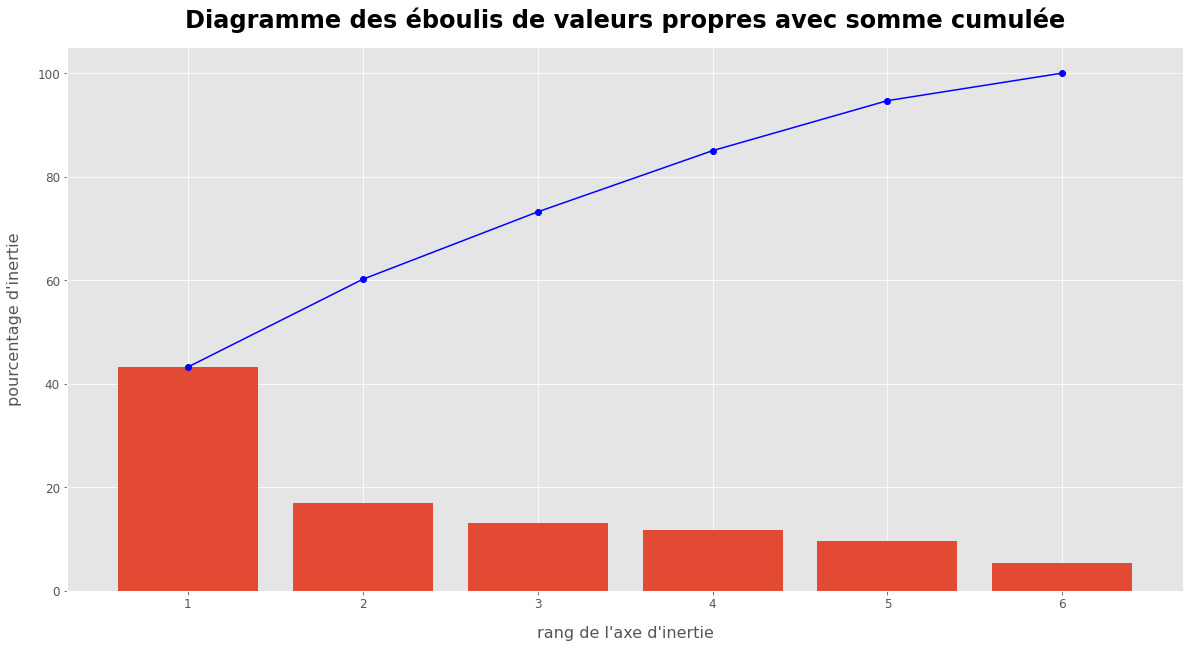

In [82]:
# Eboulis des valeurs propres.

plt.figure(figsize(20,10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o')
plt.grid(True)    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée")
plt.savefig("graphs/11-eboulis.png")
plt.show()

85% de la variance des données est expliquée par les quatre premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel.

In [83]:
print(pca.components_)

[[-0.0848711   0.33134356  0.39381277  0.50666757  0.43924936 -0.52751096]
 [ 0.94132849  0.30721979  0.10853873 -0.07313776 -0.0043775   0.04865929]
 [-0.28682076  0.88477057 -0.16656323 -0.10640619 -0.27100638  0.14968248]
 [-0.10274954 -0.04709084  0.86627893 -0.09011624 -0.44409486  0.1773263 ]
 [-0.1175189   0.10371207  0.23437556 -0.57084649  0.70967147  0.30166522]
 [ 0.0079539   0.00589436  0.00405525  0.62660188  0.180949    0.75796642]]


In [84]:
sqrt_eigval = np.sqrt(eigval)

In [85]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
   corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-0.13665769  0.94949702 -0.25350091 -0.08654432 -0.08948322  0.00449594]
 [ 0.53352256  0.30988574  0.78198715 -0.03966387  0.07897019  0.00333178]
 [ 0.63410919  0.10948059 -0.14721365  0.72965311  0.1784622   0.00229223]
 [ 0.81582566 -0.07377242 -0.09404503 -0.07590349 -0.43466356  0.35418626]
 [ 0.70727025 -0.00441548 -0.23952368 -0.37405411  0.54037002  0.10228129]
 [-0.84938726  0.04908154  0.13229393  0.14935915  0.22969902  0.42843997]]


In [86]:
df1=pd.DataFrame({'id':Billets_df_new.iloc[:,1:7].columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
df1

,id,COR_1,COR_2
0,diagonal,-0.136658,0.949497
1,height_left,0.533523,0.309886
2,height_right,0.634109,0.109481
3,margin_low,0.815826,-0.073772
4,margin_up,0.707270,-0.004415
5,length,-0.849387,0.049082


La variable diagonal contribue le plus et positivement à l'axe 2 (coefficient de corrélation de 0.95)

Les variables margin_low et margin_up contribuent le plus et positivement à l'axe 1 (coefficient de corrélation de, respectivement, 0.82 et 0.71). De plus, elles sont bien corrélées (r = 0.43)

La variable lenght contribue négativement à l'axe 1 (coefficient de corrélation de -0.84).

Les variables lenght et margin_low sont assez bien corrélées négativement (r = -0.67).

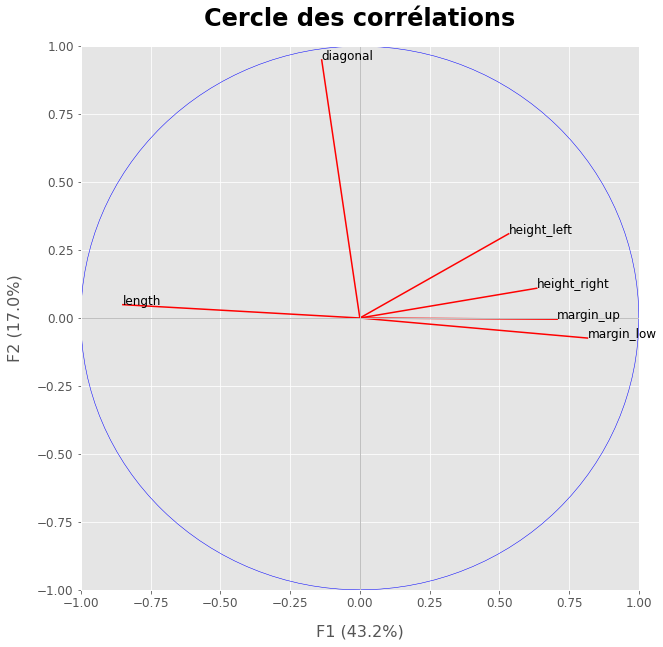

In [87]:
# Cercle des corrélations.

fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Affichage des étiquettes (noms des variables).

for j in range(6):
    plt.annotate(Billets_df_new.iloc[:,1:7].columns[j],(corvar[j,0],corvar[j,1]),size=12)
    plt.plot([0, corvar[j,0]], [0, corvar[j,1]],color='Red')

# Ajouter les axes.
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Ajouter un cercle.
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("graphs/12-cercle_correlation.png")
plt.show()
# Affichage.
#plt.show()

La variable diagonal contribue fortement et positivement à l'axe 2.

Les variables margin_low et margin_up contribuent le plus et positivement à l'axe 1.

Les variables height_left et height_right contribuent positivement à l'axe 1.

La variable lenght contribue négativement à l'axe 1.

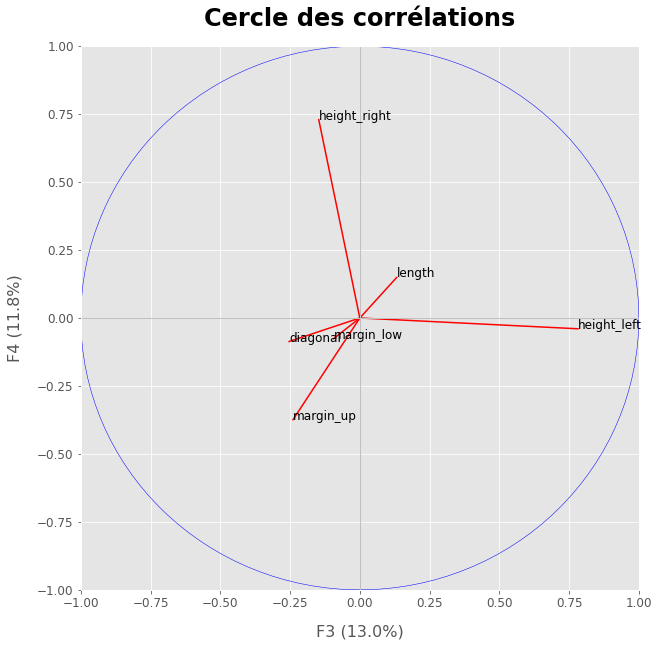

In [88]:
# Cercle des corrélations.

fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Affichage des étiquettes (noms des variables).

for j in range(6):
   plt.annotate(Billets_df_new.iloc[:,1:7].columns[j],(corvar[j,2],corvar[j,3]),size=12)
   plt.plot([0, corvar[j,2]], [0, corvar[j,3]],color='Red') 
# Ajouter les axes.
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Ajouter un cercle.
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(100*pca.explained_variance_ratio_[3],1)))

plt.savefig("graphs/13-cercle_correlation.png")
plt.show()

La variable height_right contribue fortement et positivement à l'axe 2

La variable height_left contribue le plus et positivement à l'axe 1.

La variable margin_up contribue moyennement et négativement à l'axe 2.

Les autres variables n'ont pas de contribution significative sur aucun axe.

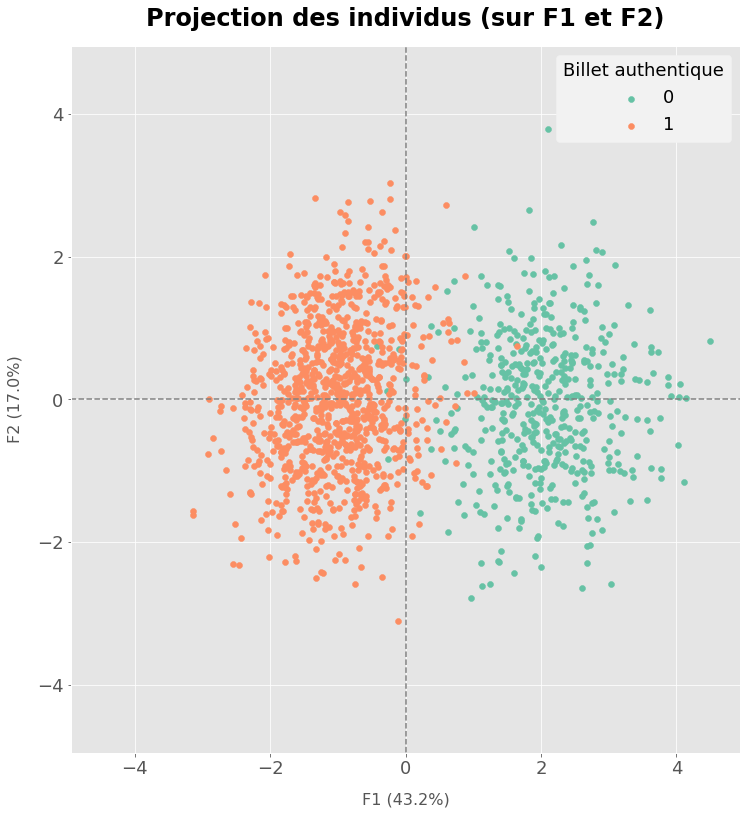

In [89]:
# Projection des individus Sur le premier plan factoriel.

fig1, ax1 = acp1.graphique_factorial_planes(axis_ranks=(0,1), illustrative_var=Billets_df_new.is_genuine, illustrative_legend="Billet authentique")
plt.savefig("graphs/14-projectionp1.png")
plt.show()

La séparation entre les faux billets et les crais billets s'effectue sur le premier axe d'inertie. Les faux billets tendent à avoir un ratio hauteur sur longueur supérieur aux vrais billets, à diagonale similaire. La diagonale seule ne permet pas de discriminer les faux billets et les vrais billets. Par contre, elle est importante pour déterminer le seuil de F1 entre les vrais et les faux billets. Le premier plan factoriel est donc à considérer dans son ensemble : F2 est aussi important que F1 pour séparer efficacement les vrais des faux billets.

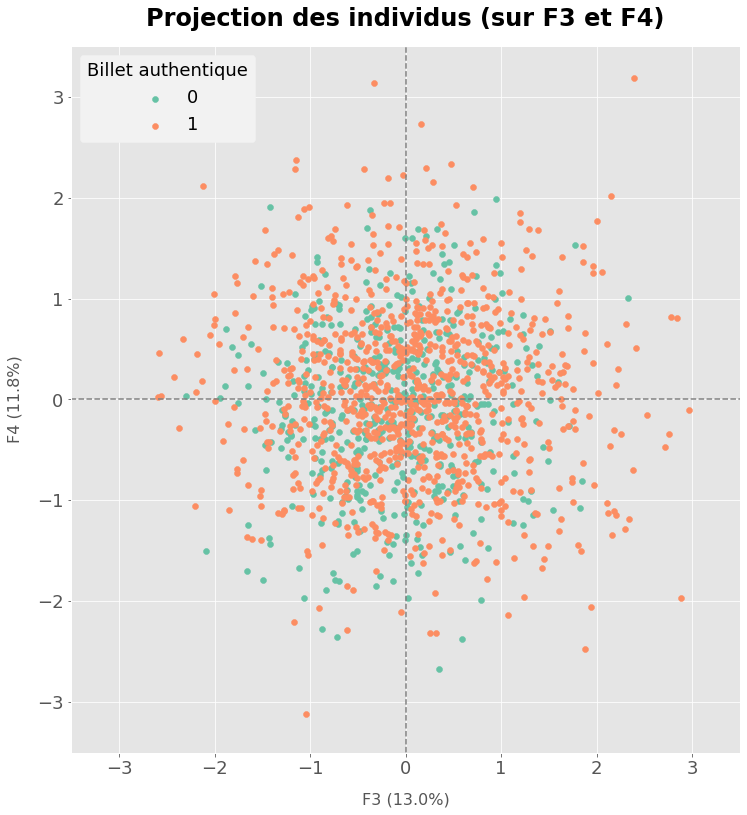

In [90]:
# Projection des individus Sur le premier plan factoriel.

fig, ax = acp1.graphique_factorial_planes(axis_ranks=(2,3), illustrative_var=Billets_df_new.is_genuine, illustrative_legend="Billet authentique")
plt.savefig("graphs/15-projectionp2.png")
plt.show()

Le deuxième plan factoriel ne permet pas de séparer les vrais billets et les faux billets. Le ratio des marges internes et le ratio de la hauteur sur la diagonale ne permettent donc pas de discriminer les vrais billets et les faux billets.

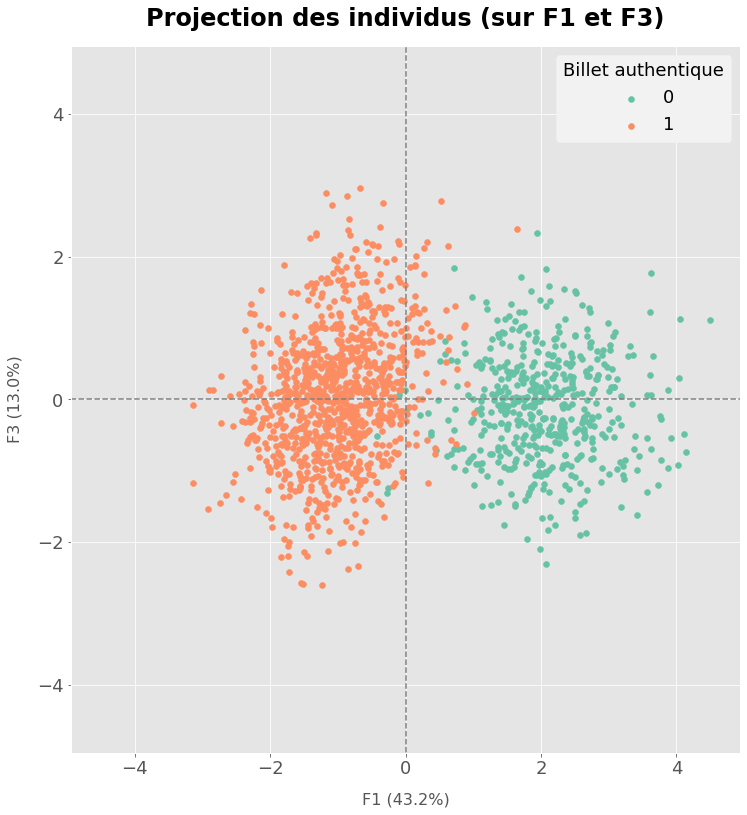

In [91]:
# Projection des individus Sur les premier et troisième axes du plan factoriel.

fig, ax = acp1.graphique_factorial_planes(axis_ranks=(0,2), illustrative_var=Billets_df_new.is_genuine, illustrative_legend="Billet authentique")
plt.savefig("graphs/16-projectionp13.png")
plt.show()

Etant donné que les marges internes sont deux mesures qui semblent assez efficaces pour séparer les vrais des faux billets lorsque'elles sont prises individuellement, le troisième axe d'inertie a un certain intérêt dans différenciation entre vrais et faux billets, d'autant qu'il représente 13% de l'inertie totale. Cest ce qui est confirmé dans dans ce graphique.

le quatrième axe d'inertie a aussi un certain intérêt dans différenciation entre vrais et faux billets, d'autant qu'il représente environ 11.8% de l'inertie totale. Cest ce qui est confirmé par le graphique ci-dessus.

In [92]:
# Déterminons les différents centroïdes.

df_cluster = Billets_df_new[["is_genuine"]]
df_cluster.columns = ["cluster"]
acp1.calculate_centroids_projection(df_cluster)
acp1.df_centroids_projected.index = ["Faux billets","Vrais Billets"]
acp1.df_centroids_projected

,F1 (43.2%),F2 (17.0%),F3 (13.0%),F4 (11.8%),F5 (9.7%),F6 (5.3%)
Faux billets,2.037592,-0.080755,-0.115590,-0.105652,-0.149978,-0.054103
Vrais Billets,-1.018796,0.040378,0.057795,0.052826,0.074989,0.027052


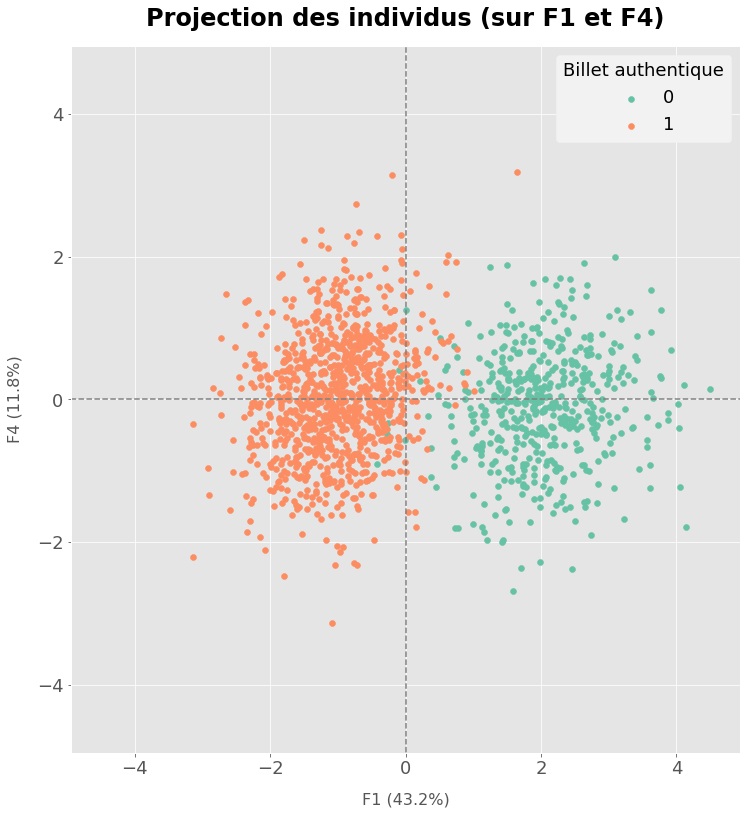

In [93]:
# Projection des individus Sur les premier et quatrième axes du plan factoriel.

fig, ax = acp1.graphique_factorial_planes(axis_ranks=(0,3), illustrative_var=Billets_df_new.is_genuine, illustrative_legend="Billet authentique")
plt.savefig("graphs/17-projectionp14.png")
plt.show()

La projection des centroïdes des faux billets et des billets authentiques confirme que la principale différenciation s'opère sur le premier axe d'inertie, à savoir sur le ratio hauteur sur longueur, avec une valeur largement supérieure pour les faux billets. Dans une moindre mesure, on constate que la diagonale des faux billets tend à être inférieure à celle des billets authentiques. La projection des individus sur le premier plan factoriel le montrait : ces deux valeurs sont à analyser en commun. Plus la diagonale est élevée, plus la valeur frontière entre les faux billets et les billets authentiques du ratio hauteur sur longueur est élevée.

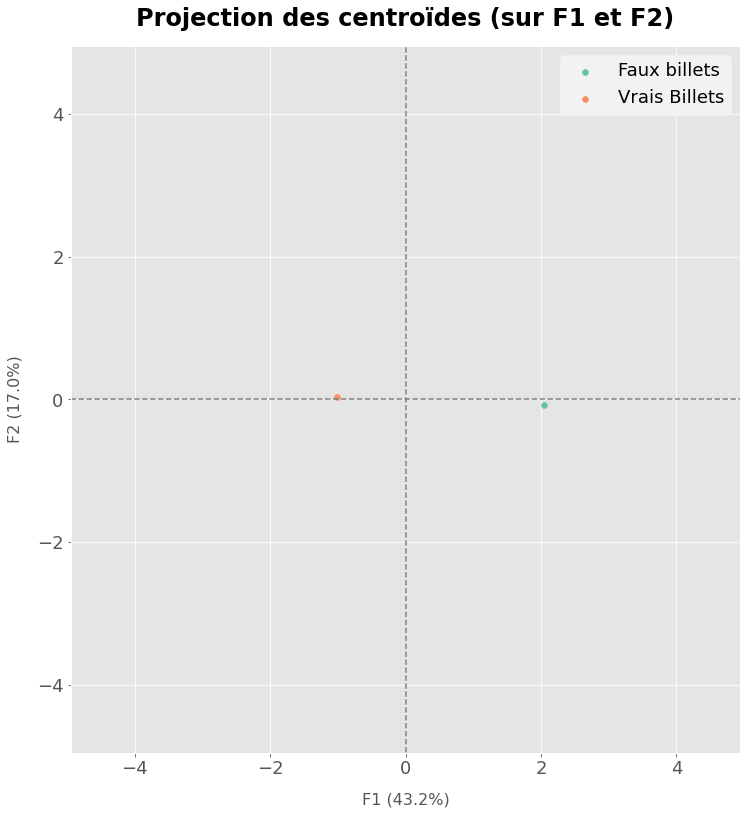

In [94]:
fig, ax = acp1.graphique_centroids_projection(illustrative_var=acp1.df_centroids_projected.index)
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
plt.savefig("graphs/18-centroidsp1.png")
plt.show()

In [95]:
# Concatenation du dataset de base et des composantes principales.

df=pd.concat([Billets_df_new.reset_index(drop=True),pd.DataFrame(coord)],axis=1)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,0,1,2,3,4,5
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654


In [96]:
# L'éboulis montre que seuls les quatre premiers facteurs expliquent 85% de la variance cumulée.

df.columns.values[-6:]=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']

df['billet']=df['is_genuine'].map({1:'Vrai_billet',0:'Faux_billet'})

In [97]:
#df = df[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length','PCA1','PCA2','PCA3','PCA4']]

In [98]:
df['billet']=df['is_genuine'].map({1:'Vrai_billet', 0:'Faux_billet'})

In [99]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,billet
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945,Vrai_billet
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099,Vrai_billet
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210,Vrai_billet
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359,Vrai_billet
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120,Faux_billet
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673,Faux_billet
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537,Faux_billet
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654,Faux_billet


In [100]:
df1=df.reset_index()

df1

,index,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,billet
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945,Vrai_billet
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099,Vrai_billet
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210,Vrai_billet
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359,Vrai_billet
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120,Faux_billet
1496,1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673,Faux_billet
1497,1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537,Faux_billet
1498,1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654,Faux_billet


In [101]:
# Renommons l'index.

df1=df1.rename(columns = {'index': 'id_billet'})

# Visualisation du fichier.

df1

,id_billet,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,billet
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945,Vrai_billet
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099,Vrai_billet
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210,Vrai_billet
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359,Vrai_billet
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120,Faux_billet
1496,1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673,Faux_billet
1497,1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537,Faux_billet
1498,1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654,Faux_billet


In [102]:
# nouvelle données finales.

df_new = df1[['id_billet','is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length','PCA1','PCA2','PCA3','PCA4','billet']] 

In [103]:
df_new

,id_billet,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,billet
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,Vrai_billet
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,Vrai_billet
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,Vrai_billet
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,Vrai_billet
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,Faux_billet
1496,1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,Faux_billet
1497,1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,Faux_billet
1498,1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,Faux_billet


In [104]:
# Projection sur le plan factoriel.

figure = px.scatter(df_new, x="PCA1", y="PCA2", color="billet" ,hover_data=['id_billet'])

figure.show()

L'ACP identifie bien les billets en 2 groupes (les vrais et les faux). On peut voir que quelques points se situent entre les deux groupes. Ces point pourraient poser problème plus tard.

# Classification non supervisée: Algorithme de KMEANS

In [105]:
billets_km = Billets_df_new


y_km = Billets_df_new.iloc[:,0]

Xkm = Billets_df_new.iloc[:,1:7]

print(y_km.value_counts())

1    1000
0     500
Name: is_genuine, dtype: int64


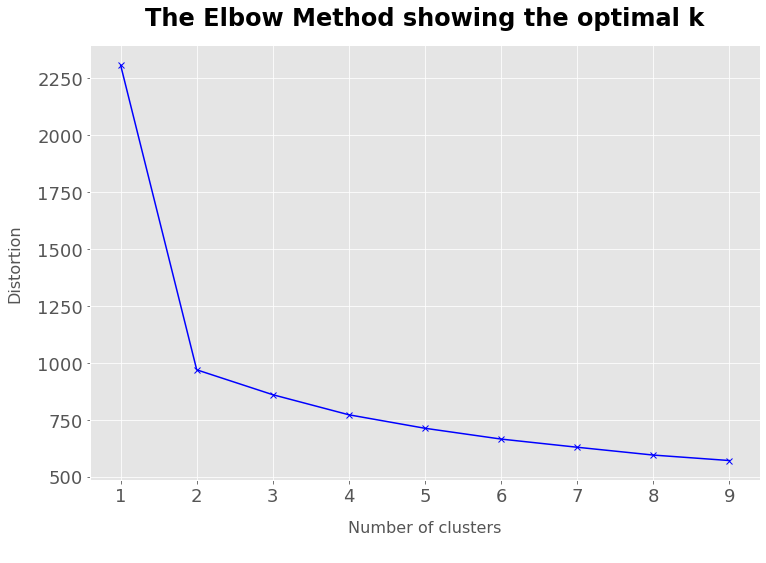

In [106]:
# Déterminer le nombre des clusters.

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
circle_rad = 15
plt.annotate('optimal nb of C',xy=(2, 122),size=15,color='r', weight='bold',xytext=(60, 60),textcoords='offset points',
         bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.2),
         arrowprops=dict(arrowstyle='simple,tail_width=0.5,head_width=1,head_length=1.2',facecolor='r',shrinkB=circle_rad*1)
            )
                    
plt.savefig('graphs/19-elbow_k-means.jpg',dpi=300)
plt.show()

La méthode du coude décelle une partition avec 2 clusters. Etant donné donné que nous cherchons à distinguer les vraisvdes faux billets, ce résultats semble pedrtinent. 

## Méthode des K-Means sur les données.

In [107]:
billets_std=std_scaler.fit_transform(Xkm)

In [108]:
pca.fit(billets_std)

PCA()

In [109]:
print(pca.n_components_)

6


In [110]:
scores_pca=pca.transform(billets_std)

In [111]:
scores_pca

array([[ 1.64752398,  0.74687568,  2.39291535,  3.18640502,  0.30576617,
        -0.01194549],
       [-2.01970332, -2.20674552, -1.00261896,  0.0709126 ,  0.03725493,
        -0.47509937],
       [-0.96900713,  2.61932079,  1.20196657, -0.9213195 , -0.83779319,
         0.19721042],
       ...,
       [ 1.88868908, -0.60075869, -0.54549211, -0.1001415 , -0.30409504,
         0.50353731],
       [ 1.78963708,  0.51105941,  0.02813798, -0.47406649,  0.35028364,
         0.53065384],
       [ 1.04301779, -1.47122031,  0.48285984, -0.68395482,  0.48913316,
        -0.22985869]])

In [112]:
km_pca=KMeans(n_clusters=2,init='k-means++',random_state=100).fit(billets_std)

In [113]:
billets_km

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [114]:
df_clus_km_pca=pd.concat([billets_km.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)

In [115]:
df_clus_km_pca.columns.values[-6:]=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']

In [116]:
df_clus_km_pca['clusters_Km']=km_pca.labels_

In [117]:
df_clus_km_pca

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,clusters_Km
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099,0
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210,0
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359,0
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120,1
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673,1
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537,1
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654,1


In [118]:
if df_clus_km_pca[df_clus_km_pca['clusters_Km']==0].shape[0] < df_clus_km_pca[df_clus_km_pca['clusters_Km']==1].shape[0]:
      df_clus_km_pca['clusters']=df_clus_km_pca['clusters_Km'].map({1:'Vrai_billet',0:'Faux_billet'})
else :
      df_clus_km_pca['clusters']=df_clus_km_pca['clusters_Km'].map({0:'Vrai_billet',1:'Faux_billet'})

In [119]:
df_clus_km_pca['billets']=df_clus_km_pca['is_genuine'].map({1:'Vrai_billet',0:'Faux_billet'})

In [120]:
df_clus_km_pca

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,clusters_Km,clusters,billets
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,0.305766,-0.011945,1,Faux_billet,Vrai_billet
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0.037255,-0.475099,0,Vrai_billet,Vrai_billet
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,-0.837793,0.197210,0,Vrai_billet,Vrai_billet
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0.804194,-0.225359,0,Vrai_billet,Vrai_billet
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,1.184748,-0.291198,0,Vrai_billet,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,-0.235951,-1.318120,1,Faux_billet,Faux_billet
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,-0.109673,-0.541673,1,Faux_billet,Faux_billet
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,-0.304095,0.503537,1,Faux_billet,Faux_billet
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,0.350284,0.530654,1,Faux_billet,Faux_billet


In [121]:
df_clus_km = df_clus_km_pca[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length','PCA1','PCA2','PCA3','PCA4','clusters_Km','clusters','billets']]

In [122]:
df_clus_km

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,clusters_Km,clusters,billets
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647524,0.746876,2.392915,3.186405,1,Faux_billet,Vrai_billet
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019703,-2.206746,-1.002619,0.070913,0,Vrai_billet,Vrai_billet
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969007,2.619321,1.201967,-0.921319,0,Vrai_billet,Vrai_billet
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375629,-1.817808,0.646521,0.830747,0,Vrai_billet,Vrai_billet
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150222,-0.566097,0.854019,-1.784685,0,Vrai_billet,Vrai_billet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1.428771,-0.270065,0.946093,0.521701,1,Faux_billet,Faux_billet
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,3.280741,1.317273,0.615431,0.337012,1,Faux_billet,Faux_billet
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1.888689,-0.600759,-0.545492,-0.100141,1,Faux_billet,Faux_billet
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1.789637,0.511059,0.028138,-0.474066,1,Faux_billet,Faux_billet


# Représentations des billets dans le plan factoriel.

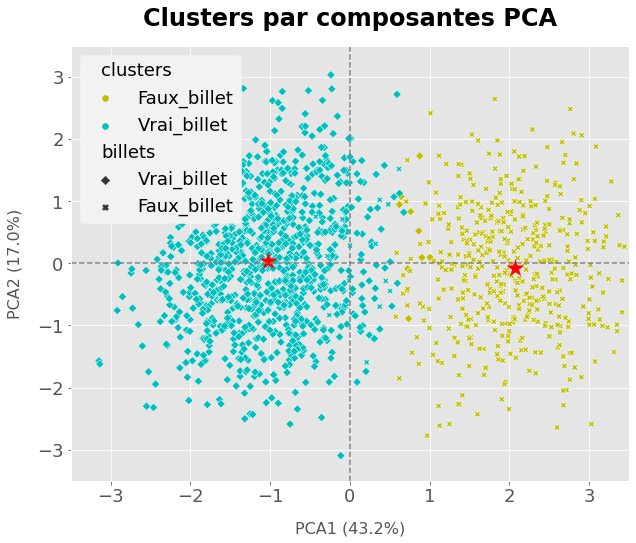

In [123]:
markers = {'Vrai_billet': "D", 'Faux_billet': "X"}
x_axis=df_clus_km['PCA1']
y_axis=df_clus_km['PCA2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_clus_km['clusters'],style=df_clus_km['billets'],palette=['y','c'],markers=markers)
# Affichage des positions des centres de classes
centroids = km_pca.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],marker='*', s = 300, c = 'red' , label = 'centeroid')
plt.title('Clusters par composantes PCA')
#plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.axhline(y=0, color='grey',ls='--')
plt.axvline(x=0, color='grey',ls='--')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel('PCA{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('PCA{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
#plt.plot([0, 0.5], [-2, 2], 'k-', color = 'g',ls='-',lw=3)
plt.savefig('graphs/20-Class_k-means.jpg',dpi=300)
plt.show()
plt.show()

In [124]:
df_clus_km[['is_genuine','clusters_Km']]

,is_genuine,clusters_Km
0,1,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1495,0,1
1496,0,1
1497,0,1
1498,0,1


# Matrice de confusion.

In [125]:
Mat_confusion=pd.crosstab(df_clus_km['billets'],df_clus_km['clusters'])

In [126]:
def confusion_matrix(df):
    sns.heatmap(df, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".0f", vmin=0, vmax=600)
    plt.title('Matrice de confusion', fontsize = 15, fontweight='bold')
    plt.show()

In [127]:
Mat_confusion

clusters,Faux_billet,Vrai_billet
billets,,
Faux_billet,486,14
Vrai_billet,10,990


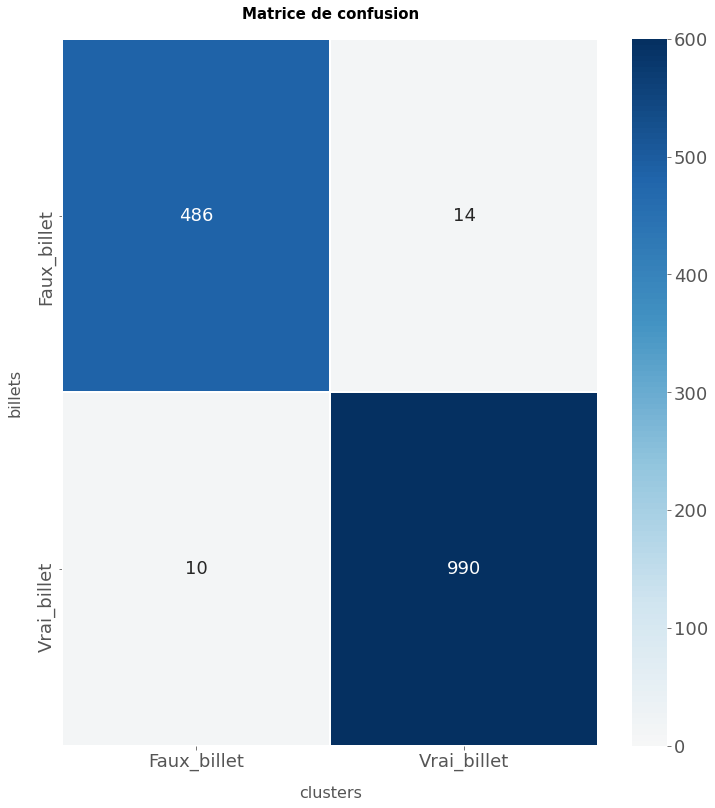

<Figure size 864x936 with 0 Axes>

In [128]:
confusion_matrix(Mat_confusion)
plt.savefig('graphs/211-Matrice_confusion_KM.jpg',dpi=300)
plt.show()

Nous remarquons que certains points, à l'interface entre les 2 clusters, peuvent être mal attribués.

 Depuis, 24 billets ont été mal-détectés avec la méthode des k-means.

In [61]:
Precision=Mat_confusion['Vrai_billet'][1]/(Mat_confusion['Vrai_billet'][1]+Mat_confusion['Faux_billet'][1])
print(f'La précision du modèle est de {Precision}' )

La précision du modèle est de 0.99


In [62]:
Recall=Mat_confusion['Vrai_billet'][1]/(Mat_confusion['Vrai_billet'][1]+Mat_confusion['Vrai_billet'][0])
print(f'Le rappel du modèle est de {Recall}' )

Le rappel du modèle est de 0.9860557768924303


In [63]:
F1_score=(2*(Precision*Recall))/(Precision+Recall)
print(f'Le score F1 du modèle est de {F1_score}' )

Le score F1 du modèle est de 0.9880239520958083


In [64]:
# Déterminons les 24 billets mal-détectés avec la méthode KMEANS.

# L'Algorithme KMEANS détermine que le billet est Faux alors qu'il est Vrai.

HH1 = df_clus_km[(df_clus_km.clusters=='Faux_billet')&(df_clus_km.billets=='Vrai_billet')]

# L'Algorithme KMEANS détermine que le billet est Vrai alors qu'il est Faux.

HH2 = df_clus_km[(df_clus_km.clusters=='Vrai_billet')&(df_clus_km.billets=='Faux_billet')]

In [65]:
# Ecriture matricielle des deux possibilités.

HH = [HH1, HH2]

# Concatenation des deux possibilités.

HH = pd.concat(HH)

# Visualisation des billets mal-détectés avec l'Algorithme de KMEANS.

HH

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PCA1,PCA2,PCA3,PCA4,clusters_Km,clusters,billets
0,1,171.81,104.86,104.95,4.52000,2.89,112.83,1.647524,0.746876,2.392915,3.186405,1,Faux_billet,Vrai_billet
253,1,172.07,104.33,104.33,4.41000,3.39,113.39,0.763152,0.832417,0.428395,0.702909,1,Faux_billet,Vrai_billet
341,1,171.90,104.21,104.21,4.77000,3.38,113.20,0.904872,0.094420,0.215982,0.391058,1,Faux_billet,Vrai_billet
580,1,171.76,104.48,104.01,4.35000,3.37,113.09,0.725676,-0.086514,1.308494,-0.082330,1,Faux_billet,Vrai_billet
626,1,171.98,104.44,104.08,4.67000,3.21,112.73,0.865060,0.522026,1.021365,0.225893,1,Faux_billet,Vrai_billet
669,1,172.14,104.34,104.20,4.63000,3.02,112.47,0.621388,0.946596,0.698035,0.823817,1,Faux_billet,Vrai_billet
724,1,172.16,104.43,104.06,4.51000,3.19,112.69,0.643111,1.076349,0.875158,0.165675,1,Faux_billet,Vrai_billet
728,1,171.94,104.11,104.16,4.08000,3.35,111.76,1.006433,0.095291,-0.192267,0.119320,1,Faux_billet,Vrai_billet
743,1,172.30,104.58,104.17,4.36000,3.33,112.98,0.878082,1.729077,1.040811,0.198806,1,Faux_billet,Vrai_billet
946,1,171.63,103.87,104.66,4.09696,3.27,112.68,0.737049,-0.889817,-0.617338,1.930076,1,Faux_billet,Vrai_billet


In [66]:
HH.shape

(24, 14)

Je génère la matrice de confusion, ici je génère un dataframe en %

In [67]:
y_actu = pd.Series(df_clus_km['billets'], name='Actual')

y_pred = pd.Series(df_clus_km['clusters'], name='Predicted')

df_confusion = pd.crosstab(y_actu, y_pred, normalize="index")

df_confusion

Predicted,Faux_billet,Vrai_billet
Actual,,
Faux_billet,0.972,0.028
Vrai_billet,0.010,0.990


Interprétation de la matrice de confusion.
Elle permet d'obtenir des renseignements sur les performances du modèle.

Pour 500 Faux billets,

486 sont bien placés;
14 sont prédis comme étant vrais alors qu'ils sont faux en réalité (faux positifs).

Pour 1000 vrais billets,

990 ont été bien placés (recall);
10 ont été prédis comme étant faux alors qu'ils étaient vrai (faux négatifs)

In [68]:
print(classification_report(y_actu,y_pred))

              precision    recall  f1-score   support

 Faux_billet       0.98      0.97      0.98       500
 Vrai_billet       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

